In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use(['dark_background'])
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

print('Train:', df_train.shape)
print('Test:', df_test.shape)

Train: (3000, 23)
Test: (4398, 22)


In [3]:
df_train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

# NaN

## Train

In [5]:
nan_series = df_train.isna().sum()
nan_df = pd.DataFrame({'features': nan_series.index, 'total': nan_series.values})
nan_df['perc'] = nan_df['total'] / df_train.shape[0]
nan_df.sort_values(['perc'], ascending = False)

,features,total,perc
1,belongs_to_collection,2396,0.798667
4,homepage,2054,0.684667
17,tagline,597,0.199000
19,Keywords,276,0.092000
11,production_companies,156,0.052000
12,production_countries,55,0.018333
15,spoken_languages,20,0.006667
21,crew,16,0.005333
20,cast,13,0.004333
8,overview,8,0.002667


In [6]:
drop_cols = ['belongs_to_collection', 'homepage', # many NaNs
             'original_title', # NLP
             'poster_path', 'imdb_id'] # unused

df_train.drop(drop_cols, axis = 1, inplace = True)
df_test.drop(drop_cols, axis = 1, inplace = True)

print('Train:', df_train.shape)
print('Test:', df_test.shape)

Train: (3000, 18)
Test: (4398, 17)


In [7]:
nan_series = df_train.isna().sum()
nan_df = pd.DataFrame({'features': nan_series.index, 'total': nan_series.values})
nan_df['perc'] = nan_df['total'] / df_train.shape[0]
nan_df.sort_values(['perc'], ascending = False)

,features,total,perc
12,tagline,597,0.199000
14,Keywords,276,0.092000
6,production_companies,156,0.052000
7,production_countries,55,0.018333
10,spoken_languages,20,0.006667
16,crew,16,0.005333
15,cast,13,0.004333
4,overview,8,0.002667
2,genres,7,0.002333
9,runtime,2,0.000667


In [8]:
df_train['Keywords'].fillna('[]', inplace = True)
df_train['production_companies'].fillna('[]', inplace = True)
df_train['production_countries'].fillna('[]', inplace = True)
df_train['spoken_languages'].fillna('[]', inplace = True)
df_train['crew'].fillna('[]', inplace = True)
df_train['cast'].fillna('[]', inplace = True)
df_train['genres'].fillna('[]', inplace = True)

df_train['runtime'].fillna(df_train['runtime'].mean().item(), inplace = True)

df_train.isna().sum()

id                        0
budget                    0
genres                    0
original_language         0
overview                  8
popularity                0
production_companies      0
production_countries      0
release_date              0
runtime                   0
spoken_languages          0
status                    0
tagline                 597
title                     0
Keywords                  0
cast                      0
crew                      0
revenue                   0
dtype: int64

## Test

In [9]:
nan_series = df_test.isna().sum()
nan_df = pd.DataFrame({'features': nan_series.index, 'total': nan_series.values})
nan_df['perc'] = nan_df['total'] / df_test.shape[0]
nan_df.sort_values(['perc'], ascending = False)

,features,total,perc
12,tagline,863,0.196226
14,Keywords,393,0.089359
6,production_companies,258,0.058663
7,production_countries,102,0.023192
10,spoken_languages,42,0.009550
16,crew,22,0.005002
2,genres,16,0.003638
4,overview,14,0.003183
15,cast,13,0.002956
9,runtime,4,0.000910


In [10]:
df_test['Keywords'].fillna('[]', inplace = True)
df_test['production_companies'].fillna('[]', inplace = True)
df_test['production_countries'].fillna('[]', inplace = True)
df_test['spoken_languages'].fillna('[]', inplace = True)
df_test['crew'].fillna('[]', inplace = True)
df_test['cast'].fillna('[]', inplace = True)
df_test['genres'].fillna('[]', inplace = True)

df_test['runtime'].fillna(df_train['runtime'].mean().item(), inplace = True)
df_test['status'].fillna('Released', inplace = True)
df_test['status'].replace('Post Production', 'Released', inplace = True)

df_test.isna().sum()

id                        0
budget                    0
genres                    0
original_language         0
overview                 14
popularity                0
production_companies      0
production_countries      0
release_date              1
runtime                   0
spoken_languages          0
status                    0
tagline                 863
title                     3
Keywords                  0
cast                      0
crew                      0
dtype: int64

In [11]:
df_test[df_test['release_date'].isna()]

,id,budget,genres,original_language,overview,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
828,3829,0,"[{'id': 18, 'name': 'Drama'}]",en,"Jails, Hospitals &amp; Hip-Hop is a cinematic ...",0.009057,[],[],NaN,90.0,[],Released,three worlds / two million voices / one genera...,"Jails, Hospitals & Hip-Hop",[],[],[]


In [12]:
df_test['release_date'].fillna('03/20/01', inplace = True)
df_test.loc[828]

id                                                                   3829
budget                                                                  0
genres                                      [{'id': 18, 'name': 'Drama'}]
original_language                                                      en
overview                Jails, Hospitals &amp; Hip-Hop is a cinematic ...
popularity                                                       0.009057
production_companies                                                   []
production_countries                                                   []
release_date                                                     03/20/01
runtime                                                                90
spoken_languages                                                       []
status                                                           Released
tagline                 three worlds / two million voices / one genera...
title                                 

## Merge sets

In [13]:
train_labels = df_train.pop('revenue')
df_full = pd.concat([df_train, df_test], keys = ['train', 'test'])
df_full.shape

(7398, 17)

In [14]:
df_full.head()

id    budget                                             genres  \
train 0   1  14000000                     [{'id': 35, 'name': 'Comedy'}]   
      1   2  40000000  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
      2   3   3300000                      [{'id': 18, 'name': 'Drama'}]   
      3   4   1200000  [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...   
      4   5         0  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   

        original_language                                           overview  \
train 0                en  When Lou, who has become the "father of the In...   
      1                en  Mia Thermopolis is now a college graduate and ...   
      2                en  Under the direction of a ruthless instructor, ...   
      3                hi  Vidya Bagchi (Vidya Balan) arrives in Kolkata ...   
      4                ko  Marine Boy is the story of a former national s...   

         popularity                               production_companies  \
train 0    6.575393  [{'name': 'Paramount Pictures', 'id': 4}, {'na...   
      1    8.248895        [{'name': 'Walt Disney Pictures', 'id': 2}]   
      2   64.299990  [{'name': 'Bold Films', 'id': 2266}, {'name': ...   
      3    3.174936                                                 []   
      4    1.148070                                                 []   

                                      production_countries release_date  \
train 0  [{'iso_3166_1': 'US', 'name': 'United States o...      2/20/15   
      1  [{'iso_3166_1': 'US', 'name': 'United States o...       8/6/04   
      2  [{'iso_3166_1': 'US', 'name': 'United States o...     10/10/14   
      3            [{'iso_3166_1': 'IN', 'name': 'India'}]       3/9/12   
      4      [{'iso_3166_1': 'KR', 'name': 'South Korea'}]       2/5/09   

         runtime                                   spoken_languages    status  \
train 0     93.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
      1    113.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
      2    105.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
      3    122.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
      4    118.0           [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]  Released   

                                                   tagline  \
train 0  The Laws of Space and Time are About to be Vio...   
      1  It can take a lifetime to find true love; she'...   
      2    The road to greatness can take you to the edge.   
      3                                                NaN   
      4                                                NaN   

                                            title  \
train 0                    Hot Tub Time Machine 2   
      1  The Princess Diaries 2: Royal Engagement   
      2                                  Whiplash   
      3                                   Kahaani   
      4                                Marine Boy   

                                                  Keywords  \
train 0  [{'id': 4379, 'name': 'time travel'}, {'id': 9...   
      1  [{'id': 2505, 'name': 'coronation'}, {'id': 42...   
      2  [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...   
      3  [{'id': 10092, 'name': 'mystery'}, {'id': 1054...   
      4                                                 []   

                                                      cast  \
train 0  [{'cast_id': 4, 'character': 'Lou', 'credit_id...   
      1  [{'cast_id': 1, 'character': 'Mia Thermopolis'...   
      2  [{'cast_id': 5, 'character': 'Andrew Neimann',...   
      3  [{'cast_id': 1, 'character': 'Vidya Bagchi', '...   
      4  [{'cast_id': 3, 'character': 'Chun-soo', 'cred...   

                                                      crew  
train 0  [{'credit_id': '59ac067c92514107af02c8c8', 'de...  
      1  [{'credit_id': '52fe43fe9251416c7502563d', 'de...  
      2  [{'credit_id': '54d5356ec3a3683ba0000039', 'de...  
      

# Categorical Features

In [15]:
# df_features = df_full[['id', 'budget', 'original_language', 'popularity', 'runtime', 'release_date', 'status']]
# df_features.head()

## Label Encoder

In [16]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# df_features['original_language'] = le.fit_transform(df_features['original_language'])
# df_features['status'] = le.fit_transform(df_features['status'])

## Time Features

In [17]:
# df_features['release_date'] = pd.to_datetime(df_features['release_date'])

# df_features['release_year'] = df_features['release_date'].dt.year

# df_features['release_month'] = df_features['release_date'].dt.month
# df_features['release_quarter'] = df_features['release_date'].dt.quarter

# df_features.drop(['release_date'], axis = 1, inplace = True)

# df_features.head()

## Production Companies

In [18]:
from ast import literal_eval

def extract_dict(dict_str):
    dict_res = dict_str.replace('[', '').replace(']', '')
    dict_res = dict_res.replace('}, {', '};{')
    dict_res = dict_res.split(';')
    return dict_res

def get_cat_values(feature, value_name, is_num = False):
    value_list = set()
    for obs in df_full[feature]:
        if obs == '[]':
            continue
        item_dict = literal_eval(obs)
        for item in item_dict:
            if is_num:
                value_list.add(item[value_name])
            else:
                value_list.add(item[value_name].lower())
    print("Feature: {} - Number of values: {}".format(feature, len(value_list)))
    return value_list

def get_value_frenquency(feature, value_name, value_list, is_num = False):
    df_counts = pd.DataFrame(index = value_list)
    df_counts['counts'] = 0

    for obs in df_full[feature]:
        if obs == '[]':
            continue
        item_dict = literal_eval(obs)
        for item in item_dict:
            if is_num:
                item_id = item[value_name]
            else:
                item_id = item[value_name].lower()
            df_counts['counts'].loc[item_id] += 1
            
    return df_counts.sort_values('counts', ascending = False)

def add_features(prefix, name_list):
    for name in name_list:
        col_name = prefix + '_' + name
        df_features[col_name] = 0

In [19]:
# production_companies = get_cat_values('production_companies', 'name')

In [20]:
# company_counts = pd.DataFrame(index = production_companies)
# company_counts['counts'] = 0

# for item in df_full['production_companies']:
#     if item == '[]':
#         continue
#     companies_dict = extract_dict(item)
#     for company in companies_dict:
#         company_id = literal_eval(company)['name'].lower()
#         company_counts['counts'].loc[company_id] += 1
        
# company_counts.sort_values('counts', ascending = False).head(10)

In [21]:
# company_counts.sort_values('counts', ascending = False).to_csv('company_counts.csv')

In [22]:
# companies = pd.read_csv('company_counts_cleaned.csv')
# companies = companies[companies['counts'] > 50]
# companies = list(companies['Unnamed: 0'])
# print(len(companies))
# companies

In [23]:
# add_features('pc', companies)
    
# print(df_features.shape)
# df_features.head()

In [24]:
# from time import time

# t = time()
# count = 0
# for index, row in df_full.iterrows():
#     count += 1
#     if count % 100 == 0:
#         print(count, end = ' ')
#     for comp in companies:
#         col_name = 'pc_' + comp
#         if comp in row['production_companies'].lower():
#             df_features[col_name].loc[index] = 1
            
# print()
# t = time() - t
# print('Time elapsed: {}m{}s'.format(int(t // 60), int(t % 60)))
# df_features.head()

In [25]:
# df_features['pc_century_fox'] = df_features['pc_20th century fox'] | df_features['pc_21st century'] | df_features['pc_twentieth century fox']
# df_features['pc_lions_gate'] = df_features['pc_lions gate'] | df_features['pc_lionsgate']
# df_features['pc_dc'] = df_features['pc_dc comics'] | df_features['pc_dc entertainment']

# df_features.drop(['pc_20th century fox', 'pc_21st century', 'pc_twentieth century fox',
#                   'pc_lions gate', 'pc_lionsgate', 'pc_dc comics', 'pc_dc entertainment'],
#                   axis = 1, inplace = True)

# df_features.shape

## Production Countries

In [26]:
# df_full['production_countries'].loc['train', 0]

In [27]:
# production_countries = get_cat_values('production_countries', 'iso_3166_1')

In [28]:
# production_countries_counts = pd.DataFrame(index = production_countries)
# production_countries_counts['counts'] = 0

# for item in df_full['production_countries']:
#     if item == '[]':
#         continue
#     countries_dict = extract_dict(item)
#     for country in countries_dict:
#         country_id = literal_eval(country)['iso_3166_1']
#         production_countries_counts['counts'].loc[country_id] += 1
        
# production_countries_counts.sort_values('counts', ascending = False).head(10)

In [29]:
# production_countries_counts.sort_values('counts', ascending = False).to_csv('production_countries_counts.csv')

In [30]:
# production_countries_counts = pd.read_csv('production_countries_counts.csv')
# production_countries_counts = production_countries_counts[production_countries_counts['counts'] >= 20]
# top_production_countries = list(production_countries_counts['Unnamed: 0'])
# top_production_countries

In [31]:
# add_features('pcn', top_production_countries)
# print(df_features.shape)
# df_features.head()

In [32]:
# t = time()
# count = 0

# for index, row in df_full.iterrows():
#     count += 1
#     if count % 100 == 0:
#         print(count, end = ' ')
#     if row['production_countries'] == '[]':
#         continue
#     countries_dict = extract_dict(row['production_countries'])
#     for country in countries_dict:
#         country_id = literal_eval(country)['iso_3166_1']
#         if country_id in top_production_countries:
#             col_name = 'pcn_' + country_id
#             df_features[col_name].loc[index] = 1
            
# print()
# t = time() - t
# print('Time elapsed: {}m{}s'.format(int(t // 60), int(t % 60)))
# df_features.head()

## Genres

In [33]:
# genres = get_cat_values('genres', 'name')
# genres

In [34]:
# add_features('genre', genres)
# df_features.head()

In [35]:
# from time import time

# t = time()
# count = 0
# for index, row in df_full.iterrows():
#     count += 1
#     if count % 100 == 0:
#         print(count, end = ' ')
#     for genre in genres:
#         col_name = 'genre_' + genre
#         if genre in row['genres'].lower():
#             df_features[col_name].loc[index] = 1
            
# print()
# t = time() - t
# print('Time elapsed: {}m{}s'.format(int(t // 60), int(t % 60)))
# df_features.head()

## Spoken Language

In [36]:
# df_full['spoken_languages'].loc['train', 0]

In [37]:
# spoken_languages = get_cat_values('spoken_languages', 'iso_639_1')
# spoken_languages_counts = get_value_frenquency('spoken_languages', 'iso_639_1', spoken_languages)
# spoken_languages_counts.head(20)

In [38]:
# spoken_languages_counts.sort_values('counts', ascending = False).to_csv('spoken_languages.csv')

In [39]:
# spoken_languages_counts = pd.read_csv('spoken_languages.csv')
# spoken_languages_counts = spoken_languages_counts[spoken_languages_counts['counts'] >= 50]
# spoken_languages_counts = list(spoken_languages_counts['Unnamed: 0'])
# spoken_languages_counts

In [40]:
# add_features('spl', spoken_languages_counts)
# print(df_features.shape)
# df_features.head()

In [41]:
# t = time()
# count = 0

# for index, row in df_full.iterrows():
#     count += 1
#     if count % 100 == 0:
#         print(count, end = ' ')
#     if row['spoken_languages'] == '[]':
#         continue
#     spoken_languages_dict = extract_dict(row['spoken_languages'])
#     for lang in spoken_languages_dict:
#         lang_id = literal_eval(lang)['iso_639_1']
#         if lang_id in spoken_languages_counts:
#             col_name = 'spl_' + lang_id
#             df_features[col_name].loc[index] = 1
            
# print()
# t = time() - t
# print('Time elapsed: {}m{}s'.format(int(t // 60), int(t % 60)))
# df_features.head()

# Crew

In [42]:
# df_features['crew_size'] = df_full['crew'].apply(lambda x: x.count('{'))
# df_features['crew_size'].head()

In [43]:
# crew_jobs = get_cat_values('crew', 'job')
# crew_jobs_counts = get_value_frenquency('crew', 'job', crew_jobs)
# crew_jobs_counts.head()

In [44]:
# crew_jobs_counts.sort_values('counts', ascending = False).to_csv('crew_jobs_counts.csv')

In [45]:
# crew_jobs_counts = pd.read_csv('crew_jobs_counts.csv')
# crew_jobs_counts = crew_jobs_counts[crew_jobs_counts['counts'] > 1000]
# top_crew_jobs = list(crew_jobs_counts['Unnamed: 0'])
# top_crew_jobs

In [46]:
# add_features('crew_job', top_crew_jobs)
# print(df_features.shape)
# df_features.head()

In [47]:
# from time import time

# t = time()
# count = 0

# for index, row in df_full.iterrows():
#     count += 1
#     if count % 100 == 0:
#         print(count, end = ' ')
#     if row['crew'] == '[]':
#         continue
#     values_dict = extract_dict(row['crew'])
#     for value in values_dict:
#         value_id = literal_eval(value)['job'].lower()
#         if value_id in top_crew_jobs:
#             col_name = 'crew_job_' + value_id
#             df_features[col_name].loc[index] += 1
            
# print()
# t = time() - t
# print('Time elapsed: {}m{}s'.format(int(t // 60), int(t % 60)))
# df_features.head()

# Keywords

In [48]:
# keywords = get_cat_values('Keywords', 'name')
# keywords_count = get_value_frenquency('Keywords', 'name', keywords)
# keywords_count.head()

In [49]:
# keywords_count.sort_values('counts', ascending = False).to_csv('keywords_counts.csv')

In [50]:
# keywords_count = pd.read_csv('keywords_counts.csv')
# keywords_count = keywords_count[keywords_count['counts'] >= 100]
# top_keywords = list(keywords_count['Unnamed: 0'])
# top_keywords

In [51]:
# add_features('kw', top_keywords)
# print(df_features.shape)
# df_features.head()

In [52]:
# from time import time

# t = time()
# count = 0

# for index, row in df_full.iterrows():
#     count += 1
#     if count % 100 == 0:
#         print(count, end = ' ')
#     if row['Keywords'] == '[]':
#         continue
#     values_dict = extract_dict(row['Keywords'])
#     for value in values_dict:
#         value_id = literal_eval(value)['name'].lower()
#         if value_id in top_keywords:
#             col_name = 'kw_' + value_id
#             df_features[col_name].loc[index] += 1
            
# print()
# t = time() - t
# print('Time elapsed: {}m{}s'.format(int(t // 60), int(t % 60)))
# df_features.head()

In [53]:
# df_features['keywords_count'] = df_full['Keywords'].apply(lambda x: x.count('{'))
# df_features['keywords_count'].head()

# Day of week

In [54]:
# release_date = pd.to_datetime(df_full['release_date'])
# df_features['release_dayofweek'] = release_date.dt.dayofweek
# df_features['release_dayofweek'].head()

In [55]:
# df_features.head()

# Cast size

In [56]:
# df_features['cast_size'] = df_full['cast'].apply(lambda x: x.count('{'))
# df_features.head()

# Numerical

## Replace zeros

In [57]:
# budget_mean = df_features[df_features['budget'] != 0]['budget'].mean()
# df_features['budget'] = df_features['budget'].apply(lambda x: budget_mean if x == 0 else x)
# df_features.head()

In [58]:
# runtime_mean = df_features[(df_features['runtime'] != 0) & (df_features['runtime'] < 1000)]['runtime'].mean()
# df_features['runtime'] = df_features['runtime'].apply(lambda x: runtime_mean if x == 0 else x)
# df_features['runtime'] = df_features['runtime'].apply(lambda x: runtime_mean if x > 1000 else x)
# print(runtime_mean)
# df_features.head()

## Budget over Runtime

In [59]:
# df_features['budget_over_runtime'] = df_features['budget'] / df_features['runtime']
# df_features.head()

## Budget over Popularity

In [60]:
# df_features['budget_over_popularity'] = df_full['budget'] / df_full['popularity']
# df_features['budget_over_popularity'].head()

## Scaling

In [61]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

In [62]:
# df_features['budget'] = scaler.fit_transform(df_features['budget'].values.reshape(-1, 1))
# df_features['budget_over_runtime'] = scaler.fit_transform(df_features['budget_over_runtime'].values.reshape(-1, 1))
# df_features.head()

In [63]:
# df_features['popularity'] = scaler.fit_transform(df_features['popularity'].values.reshape(-1, 1))
# df_features.head()

In [64]:
# df_features['budget_over_popularity'] = scaler.fit_transform(df_features['budget_over_popularity'].values.reshape(-1, 1))
# df_features.head()

# Tagline

In [65]:
# df_full['tagline'].fillna('', inplace = True)

In [66]:
# df_features['tagline_length'] = df_full['tagline'].apply(lambda x: len(x))
# df_features.head()

In [67]:
# df_features['production_companies_count'] = df_full['production_companies'].apply(lambda x: x.count('{'))
# df_features['production_countries_count'] = df_full['production_countries'].apply(lambda x: x.count('{'))
# df_features.head()

# Cast Gender

In [68]:
def get_cast_gender_count(casts, gender):
    casts_dict = literal_eval(casts)
    count = 0
    for cast in casts_dict:
        if cast['gender'] == gender:
            count += 1
    return count

In [69]:
# df_features['cast_gender_0_perc'] = df_full['cast'].apply(lambda x: get_cast_gender_count(x, 0))
# df_features['cast_gender_1_perc'] = df_full['cast'].apply(lambda x: get_cast_gender_count(x, 1))
# df_features['cast_gender_2_perc'] = df_full['cast'].apply(lambda x: get_cast_gender_count(x, 2))
# df_features.head()

In [70]:
# df_features['cast_gender_0_perc'] = df_features['cast_gender_0_perc'] / df_features['cast_size']
# df_features['cast_gender_1_perc'] = df_features['cast_gender_1_perc'] / df_features['cast_size']
# df_features['cast_gender_2_perc'] = df_features['cast_gender_2_perc'] / df_features['cast_size']
# df_features.head()

# Crew Gender

In [105]:
# df_features['crew_gender_0_perc'] = df_full['crew'].apply(lambda x: get_cast_gender_count(x, 0))
# df_features['crew_gender_1_perc'] = df_full['crew'].apply(lambda x: get_cast_gender_count(x, 1))
# df_features['crew_gender_2_perc'] = df_full['crew'].apply(lambda x: get_cast_gender_count(x, 2))
# df_features[['crew_gender_0_perc', 'crew_gender_1_perc', 'crew_gender_2_perc']].head(10)

crew_gender_0_perc  crew_gender_1_perc  \
Unnamed: 0 Unnamed: 1                                           
train      0                           59                   0   
           1                            1                   4   
           2                           49                   4   
           3                            3                   0   
           4                            2                   0   
           5                            7                   0   
           6                           60                   6   
           7                            0                   1   
           8                            1                   0   
           9                            3                   4   

                       crew_gender_2_perc  
Unnamed: 0 Unnamed: 1                      
train      0                           13  
           1                            4  
           2                           11  
           3                            0  
           4                            0  
           5                            4  
           6                           11  
           7                            0  
           8                            7  
           9                            4

In [106]:
# df_features['crew_gender_0_perc'] = df_features['crew_gender_0_perc'] / df_features['crew_size']
# df_features['crew_gender_1_perc'] = df_features['crew_gender_1_perc'] / df_features['crew_size']
# df_features['crew_gender_2_perc'] = df_features['crew_gender_2_perc'] / df_features['crew_size']
# df_features[['crew_gender_0_perc', 'crew_gender_1_perc', 'crew_gender_2_perc']].head(10)

crew_gender_0_perc  crew_gender_1_perc  \
Unnamed: 0 Unnamed: 1                                           
train      0                     0.819444            0.000000   
           1                     0.111111            0.444444   
           2                     0.765625            0.062500   
           3                     1.000000            0.000000   
           4                     1.000000            0.000000   
           5                     0.636364            0.000000   
           6                     0.779221            0.077922   
           7                     0.000000            1.000000   
           8                     0.125000            0.000000   
           9                     0.272727            0.363636   

                       crew_gender_2_perc  
Unnamed: 0 Unnamed: 1                      
train      0                     0.180556  
           1                     0.444444  
           2                     0.171875  
           3                     0.000000  
           4                     0.000000  
           5                     0.363636  
           6                     0.142857  
           7                     0.000000  
           8                     0.875000  
           9                     0.363636

# Production Companies/Countries Count

In [126]:
# df_features['production_companies_count'] = df_full['production_companies'].apply(lambda x: x.count('{'))
# df_features['production_countries_count'] = df_full['production_countries'].apply(lambda x: x.count('{'))
# df_features[['production_companies_count', 'production_countries_count']].head()

production_companies_count  production_countries_count
Unnamed: 0 Unnamed: 1                                                        
train      0                                    3                           1
           1                                    1                           1
           2                                    3                           1
           3                                    0                           1
           4                                    0                           1

# Spoken Languages Count

In [141]:
df_features['spoken_languages_count'] = df_full['spoken_languages'].apply(lambda x: x.count('{'))

# Save Features

In [71]:
df_features = pd.read_csv('df_features.csv')
df_features.set_index(['Unnamed: 0', 'Unnamed: 1'], inplace = True)
df_features.head()

id        budget  original_language  popularity  \
Unnamed: 0 Unnamed: 1                                                    
train      0            1 -4.995687e-01                 10   -0.159439   
           1            2  2.596535e-01                 10   -0.021872   
           2            3 -8.120178e-01                 10    4.585709   
           3            4 -8.733396e-01                 16   -0.438968   
           4            5 -1.087817e-16                 24   -0.605583   

                       runtime  release_year  release_month  release_quarter  \
Unnamed: 0 Unnamed: 1                                                          
train      0              93.0          2015              2                1   
           1             113.0          2004              8                3   
           2             105.0          2014             10                4   
           3             122.0          2012              3                1   
           4             118.0          2009              2                1   

                       pc_warner  pc_universal  pc_paramount  \
Unnamed: 0 Unnamed: 1                                          
train      0                   0             0             1   
           1                   0             0             0   
           2                   0             0             0   
           3                   0             0             0   
           4                   0             0             0   

                       pc_columbia pictures  pc_disney  \
Unnamed: 0 Unnamed: 1                                    
train      0                              0          0   
           1                              0          1   
           2                              0          0   
           3                              0          0   
           4                              0          0   

                       pc_metro-goldwyn-mayer  pc_new line  pc_canal  \
Unnamed: 0 Unnamed: 1                                                  
train      0                                1            0         0   
           1                                0            0         0   
           2                                0            0         0   
           3                                0            0         0   
           4                                0            0         0   

                       pc_touchstone pictures  pc_fox  pc_miramax  \
Unnamed: 0 Unnamed: 1                                               
train      0                                0       0           0   
           1                                0       0           0   
           2                                0       0           0   
           3                                0       0           0   
           4                                0       0           0   

                       pc_relativity media  pc_united artists  pc_dune  \
Unnamed: 0 Unnamed: 1                                                    
train      0                             0                  1        0   
           1                             0                  0        0   
           2                             0                  0        0   
           3                             0                  0        0   
           4                             0                  0        0   

                       pc_france  pc_village roadshow  pc_sony  pc_bbc  \
Unnamed: 0 Unnamed: 1                                                    
train      0                   0                    0        0       0   
           1                   0                    0        0       0   
           2                   0                    0        0       0   
           3                   0                    0        0       0   
           4                   0                    0        0       0   

                       pc_studiocanal  pc_orion pictures  \


In [153]:
df_features.to_csv('df_features.csv')

# Target

In [73]:
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm

def plot_norm(col_name):
    sns.distplot(df_full[col_name], fit = norm)
    fig = plt.figure()
    
def log_transform(col_name, extract_zero = False):
    plot_norm(col_name)
    
    if extract_zero:
        df_full['temp'] = 0
        df_full.loc[df_full[col_name] > 0, 'temp'] = 1
        df_full.loc[df_full['temp'] == 1, col_name] = np.log(df_full[col_name])
        df_full.drop(['temp'], axis = 1, inplace = True)
    else:
        df_full[col_name] = np.log(df_full[col_name])
        
    plot_norm(col_name)

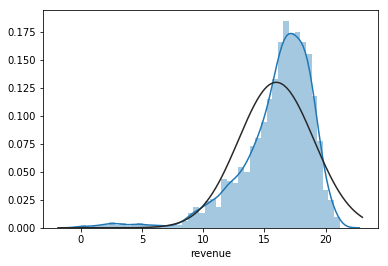

In [74]:
train_labels_log = np.log(train_labels)
sns.distplot(train_labels_log, fit = norm)

# Model

In [142]:
from sklearn.model_selection import train_test_split

train_set = df_features.loc['train']
train_set.drop(['id'], axis = 1, inplace = True)
test_set = df_features.loc['test']
print(train_set.shape)
print(test_set.shape)

# x_train, x_val, y_train, y_val = train_test_split(train_set, train_labels_log, test_size = 0.2, random_state = 1)

# print('Train:', x_train.shape, y_train.shape)
# print('Val:', x_val.shape, y_val.shape)

(3000, 134)
(4398, 135)


In [143]:
test_id = test_set.pop('id')
test_id.head()

Unnamed: 1
0    3001
1    3002
2    3003
3    3004
4    3005
Name: id, dtype: int64

## LightGBM

In [77]:
import lightgbm as lgb
import gc

# train_ds = lgb.Dataset(x_train, label = y_train)
# val_ds = lgb.Dataset(x_val, label = y_val)

# watchlist = [train_ds, val_ds]

lgb_params = {
    'learning_rate': 0.007, 
    'boosting': 'gbdt', 
    'objective': 'regression', 
    'max_depth': -1,
    'seed': 191, 
    'num_leaves': 31,
    'metric': 'rmse',
    'nthreads': 8,
    'lambda_l1': 0.5,
    'verbose': -1
}

## XGBoost

In [109]:
import xgboost as xgb

xgb_params = {
    'objective': 'reg:linear',
    'eta': 0.007,
    'max_depth': 6,
    'subsample': 0.6,
    'colsample_bytree': 0.7,
    'eval_metric': 'rmse',
    'seed': 191,
    'nthread': 8,
    'alpha': 0.5,
    'silent': True
}

gc.collect()

0

## Cross-Validation

In [144]:
from sklearn.model_selection import KFold

n_folds = 5
folds = KFold(n_splits = n_folds, shuffle = True, random_state = 191)
test_pred = pd.DataFrame()

for i, (train_index, val_index) in enumerate(folds.split(train_set)):
    print('\t\tFold', i + 1)
    
    x_train = train_set.loc[train_index, :]
    y_train = train_labels_log[train_index]
    
    x_val = train_set.loc[val_index, :]
    y_val = train_labels_log[val_index]
    
    # LightGBM
    print()
    print('LightGBM')
    print('--------------------------------')
    train_ds = lgb.Dataset(x_train, label = y_train)
    val_ds = lgb.Dataset(x_val, label = y_val)
    watchlist = [train_ds, val_ds]
    
    lgb_model = lgb.train(lgb_params, train_ds, 5000, early_stopping_rounds = 500,
                      valid_sets = watchlist, verbose_eval = 200)
    test_pred['Fold {} - LGB'.format(i + 1)] = lgb_model.predict(test_set, num_iteration = lgb_model.best_iteration)
    
    # XGBoost
    print()
    print('XGBoost')
    print('--------------------------------')
    train_matrix = xgb.DMatrix(x_train, y_train)
    val_matrix = xgb.DMatrix(x_val, y_val)
    watchlist_matrix = [(train_matrix, 'train'), (val_matrix, 'val')]
    test_matrix = xgb.DMatrix(test_set)
    
    xgb_model = xgb.train(xgb_params, dtrain = train_matrix, num_boost_round = 5000, early_stopping_rounds = 500,
                          evals = watchlist_matrix, verbose_eval = 200)
    test_pred['Fold {} - XGB'.format(i + 1)] = xgb_model.predict(test_matrix, ntree_limit = xgb_model.best_ntree_limit)
    
    print('========================================================')

		Fold 1

LightGBM
--------------------------------
Training until validation scores don't improve for 500 rounds.
[200]	training's rmse: 1.98745	valid_1's rmse: 2.00902
[400]	training's rmse: 1.61931	valid_1's rmse: 1.87246
[600]	training's rmse: 1.41107	valid_1's rmse: 1.82798
[800]	training's rmse: 1.25954	valid_1's rmse: 1.81584
[1000]	training's rmse: 1.13719	valid_1's rmse: 1.81089
[1200]	training's rmse: 1.03655	valid_1's rmse: 1.8149
[1400]	training's rmse: 0.950703	valid_1's rmse: 1.81971
Early stopping, best iteration is:
[1029]	training's rmse: 1.12126	valid_1's rmse: 1.81032

XGBoost
--------------------------------
[0]	train-rmse:15.6656	val-rmse:15.6101
Multiple eval metrics have been passed: 'val-rmse' will be used for early stopping.

Will train until val-rmse hasn't improved in 500 rounds.
[200]	train-rmse:4.3094	val-rmse:4.29842
[400]	train-rmse:1.88531	val-rmse:2.09097
[600]	train-rmse:1.45123	val-rmse:1.84066
[800]	train-rmse:1.30003	val-rmse:1.80807
[1000]	train-rm

In [82]:
# lgb_model = lgb.train(params, train_ds, 1000,
#                       valid_sets = watchlist, verbose_eval = 20)

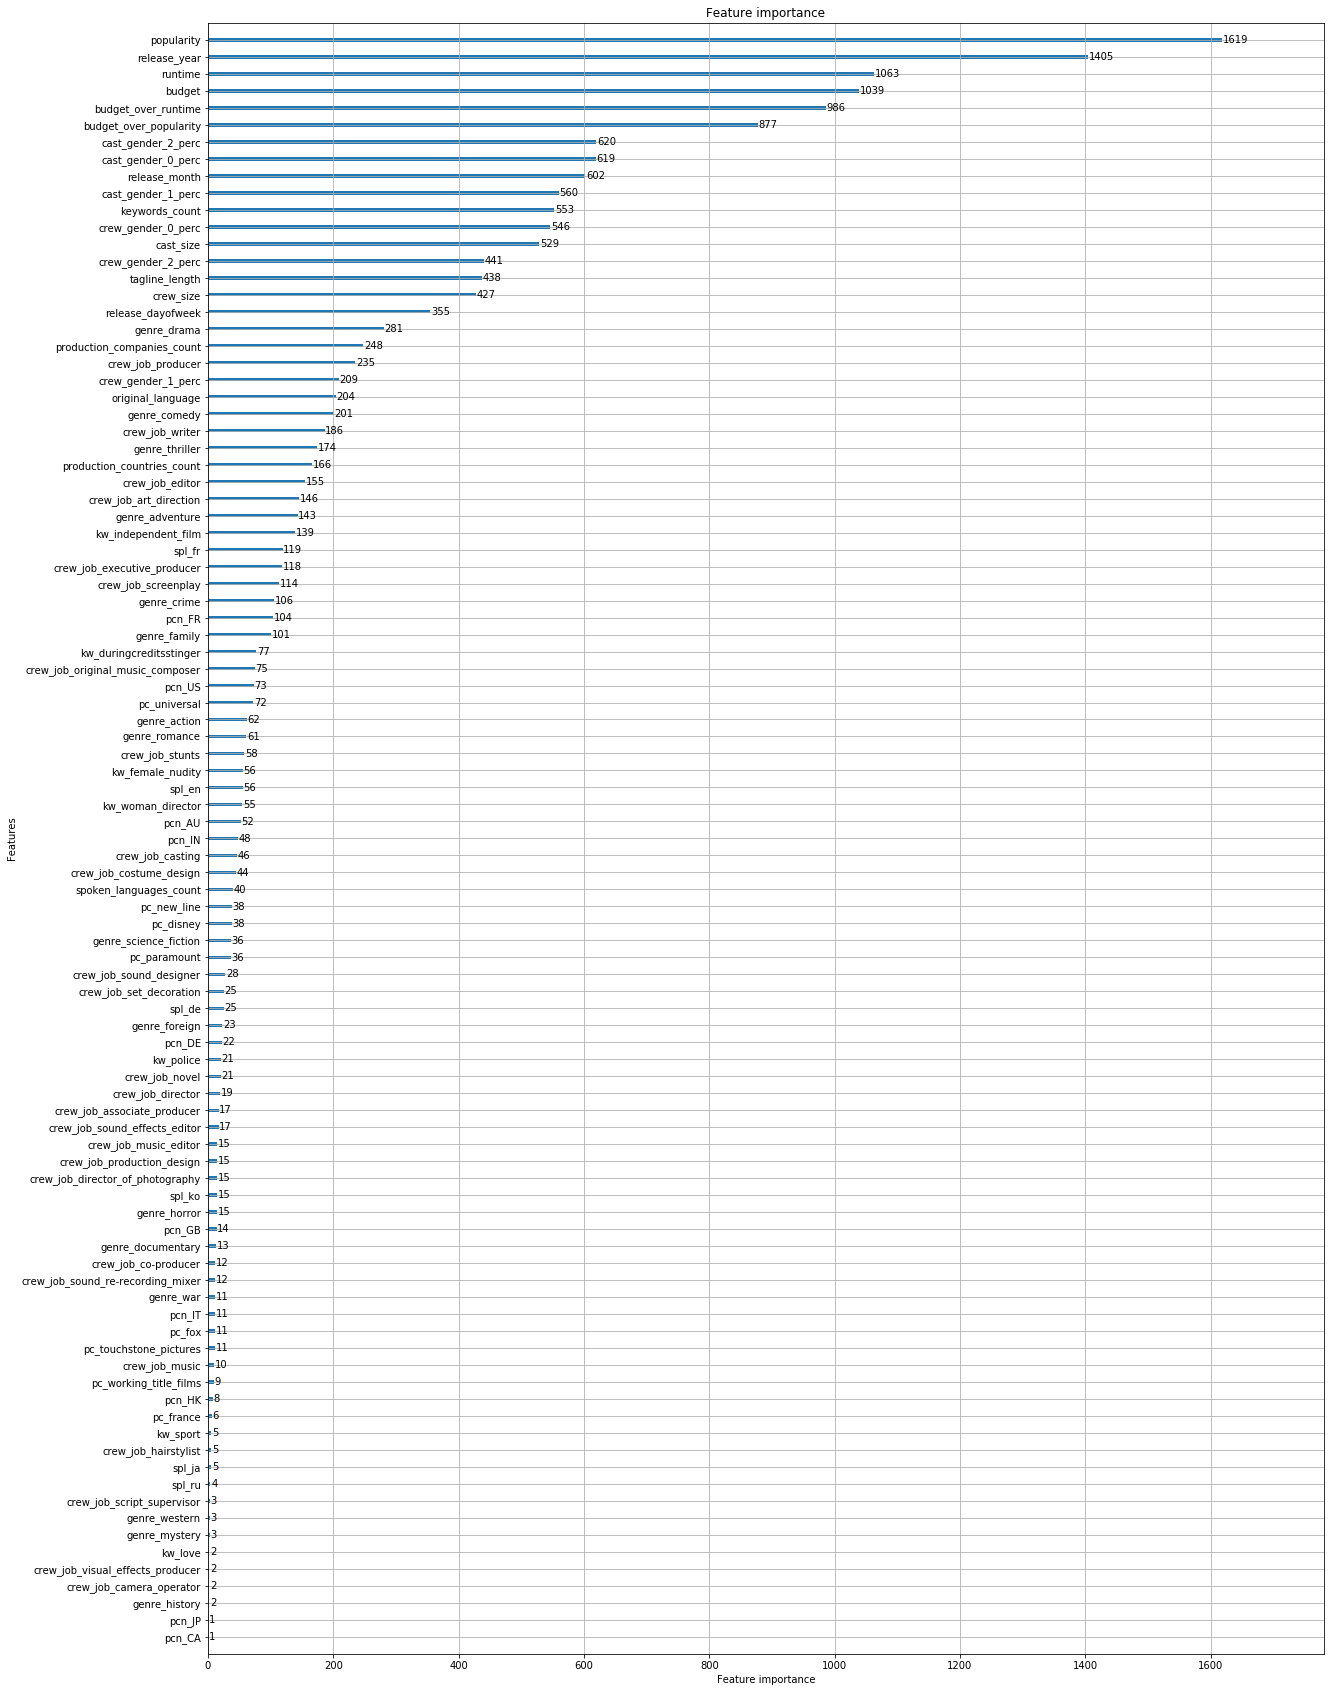

In [145]:
lgb.plot_importance(lgb_model, figsize = (20,30))

In [88]:
# df_features.drop(['crew_job_location manager', 'spl_it', 'spl_hi', 'crew_job_set designer', 'pcn_RU',
#                   'kw_sex', 'spl_zh', 'crew_job_makeup artist', 'pc_warner', 'kw_dystopia', 'spl_es'], axis = 1, inplace = True)

In [89]:
# df_features.shape

(7398, 139)

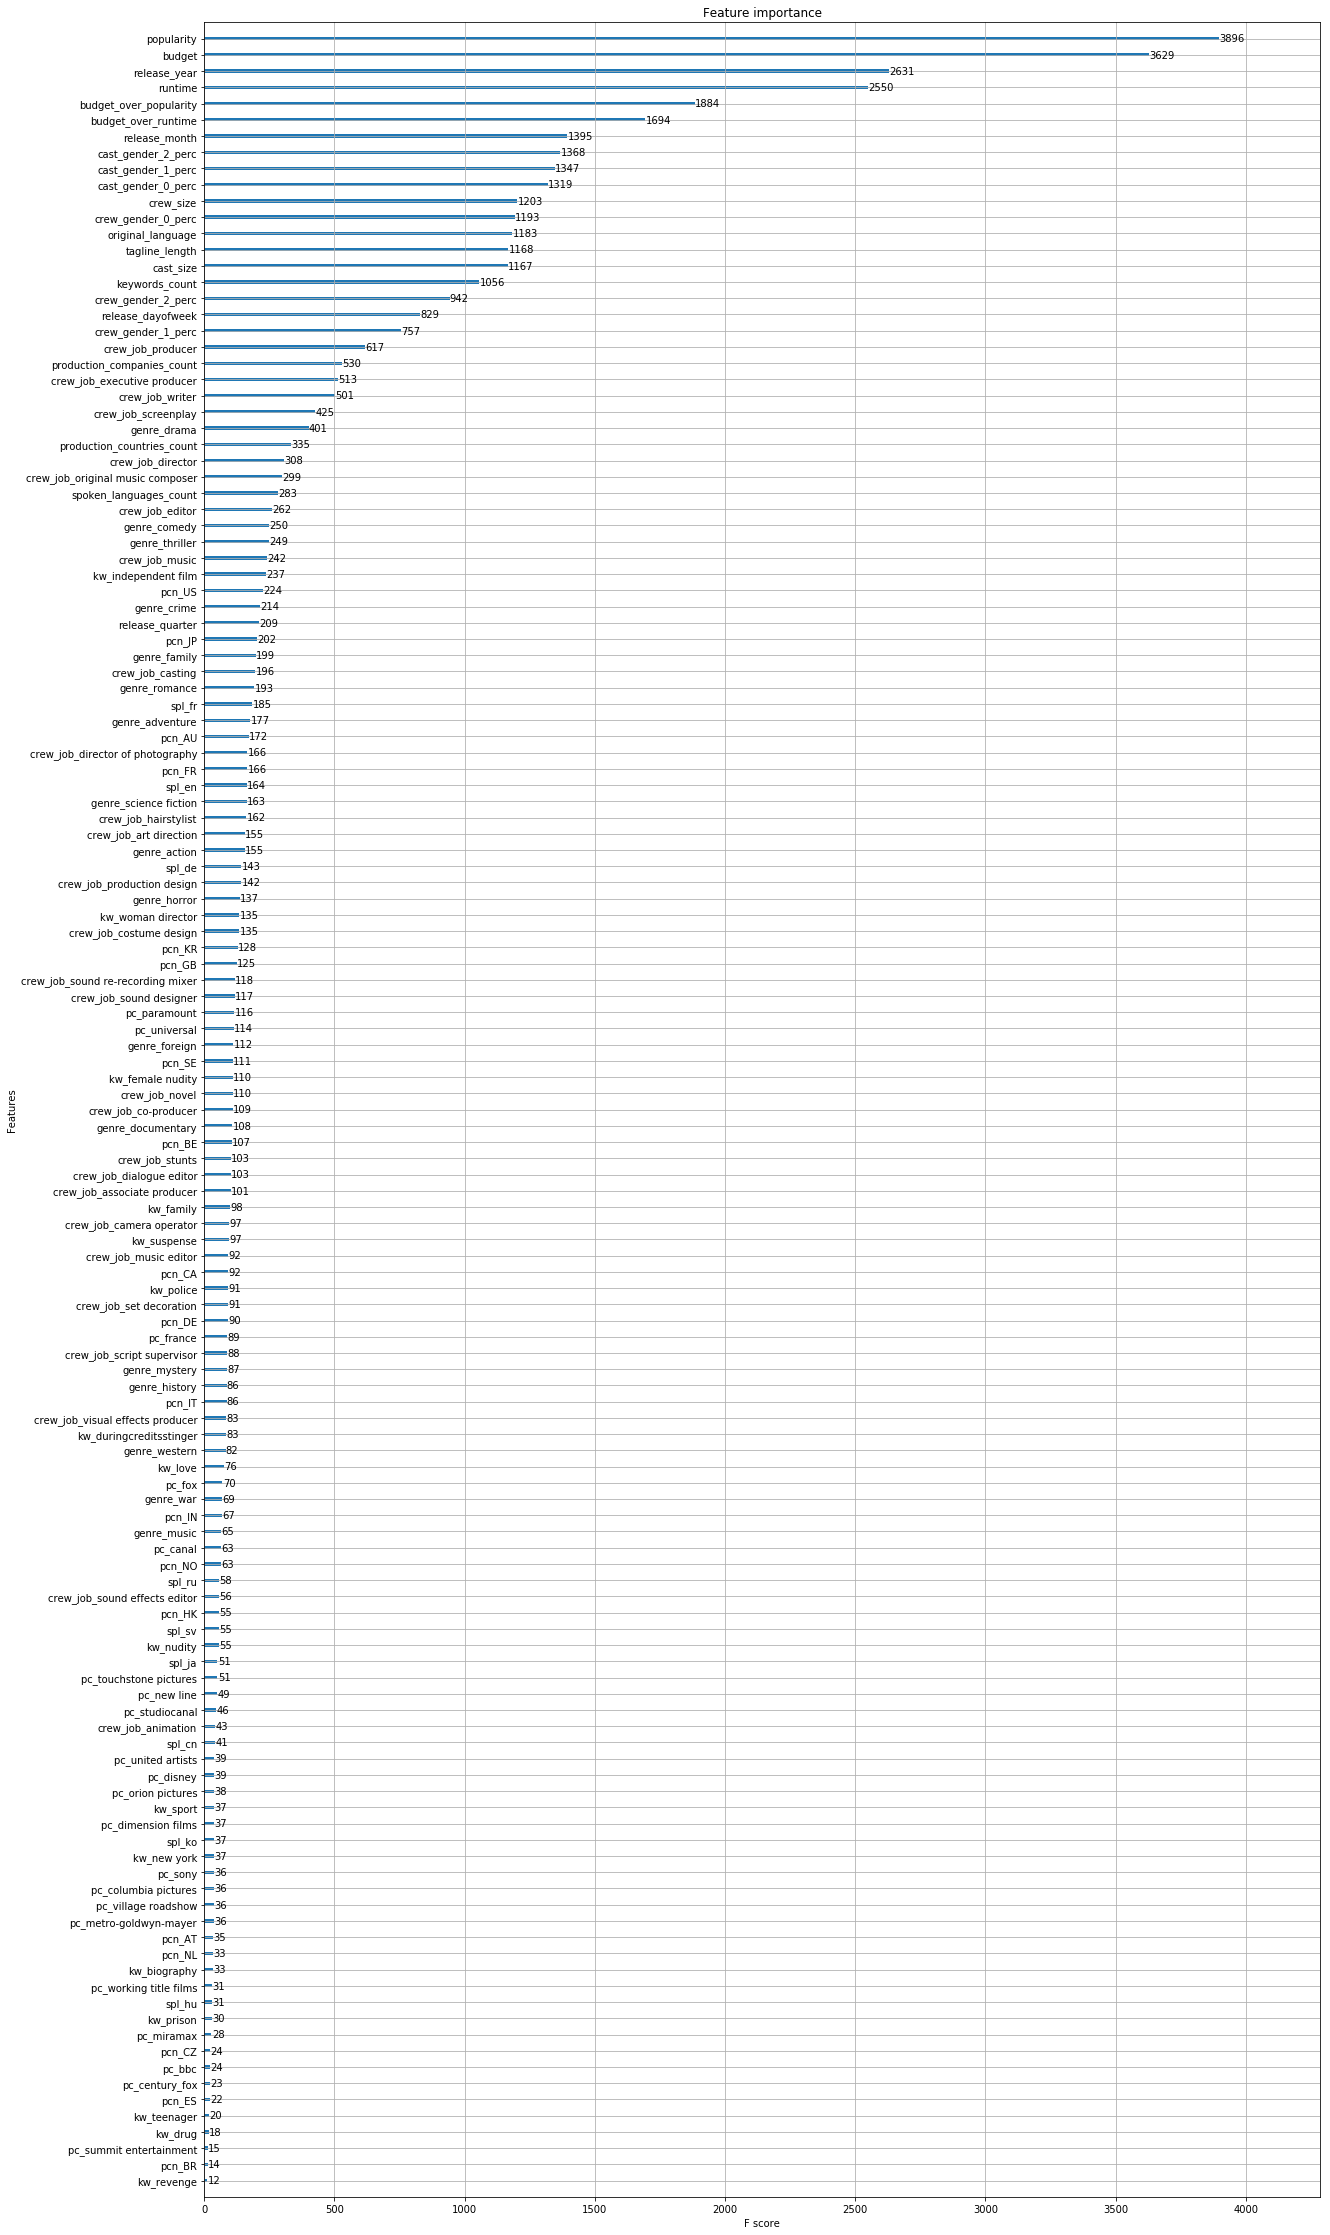

In [146]:
_, ax = plt.subplots(figsize = (20,40))
xgb.plot_importance(xgb_model, ax = ax)

In [90]:
# df_features.drop(['spl_th', 'spl_ar', 'kw_high school', 'pc_dune', 'pc_relativity media',
#                   'pcn_DK', 'pcn_IE', 'kw_musical', 'pc_hollywood pictures', 'spl_cs'], axis = 1, inplace = True)

In [91]:
# df_features.shape

(7398, 129)

# Test

In [132]:
test_pred.head()

,Fold 1 - LGB,Fold 1 - XGB,Fold 2 - LGB,Fold 2 - XGB,Fold 3 - LGB,Fold 3 - XGB,Fold 4 - LGB,Fold 4 - XGB,Fold 5 - LGB,Fold 5 - XGB
0,15.763534,15.239228,15.421605,15.349013,13.788283,15.178935,16.605457,15.892507,13.744897,15.047566
1,13.002576,14.090104,12.857043,14.049662,13.568176,14.199909,14.496991,14.005159,11.343564,13.334210
2,16.064529,15.846926,16.557276,15.986435,16.404135,16.474957,16.869582,16.460104,16.538390,16.043720
3,15.821061,14.874966,16.013255,15.806816,15.626722,16.136528,15.092391,15.509497,15.349169,15.181954
4,14.248002,13.989354,14.009823,13.874178,12.496877,12.965919,12.740366,12.870848,12.847610,13.339525


In [133]:
test_pred['avg'] = test_pred.mean(axis = 1)
test_pred.head()

,Fold 1 - LGB,Fold 1 - XGB,Fold 2 - LGB,Fold 2 - XGB,Fold 3 - LGB,Fold 3 - XGB,Fold 4 - LGB,Fold 4 - XGB,Fold 5 - LGB,Fold 5 - XGB,avg
0,15.763534,15.239228,15.421605,15.349013,13.788283,15.178935,16.605457,15.892507,13.744897,15.047566,15.203103
1,13.002576,14.090104,12.857043,14.049662,13.568176,14.199909,14.496991,14.005159,11.343564,13.334210,13.494739
2,16.064529,15.846926,16.557276,15.986435,16.404135,16.474957,16.869582,16.460104,16.538390,16.043720,16.324605
3,15.821061,14.874966,16.013255,15.806816,15.626722,16.136528,15.092391,15.509497,15.349169,15.181954,15.541236
4,14.248002,13.989354,14.009823,13.874178,12.496877,12.965919,12.740366,12.870848,12.847610,13.339525,13.338250


In [134]:
preds = test_pred['avg']
preds = np.exp(preds)
print(preds.shape)

(4398,)


In [135]:
submission = pd.DataFrame({'id': test_id, 'revenue': preds})
submission.head()

,id,revenue
Unnamed: 1,,
0,3001,4.005194e+06
1,3002,7.255893e+05
2,3003,1.229380e+07
3,3004,5.616594e+06
4,3005,6.204809e+05


In [136]:
submission.to_csv('submission.csv', index = False)